In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [3]:
zip = zipfile.ZipFile('archive.zip')
zip.extractall()

In [6]:
df=pd.read_csv("Life Expectancy Data.csv")
df['country']=df['Country']
df['GDP']=round(df['GDP'])
df['Alcohol']=round(df['Alcohol'])
df[' BMI ']=round(df[' BMI '])
df[' HIV/AIDS']=round(df[' HIV/AIDS'])
df['Schooling']=round(df['Schooling'])
df[' thinness  1-19 years']=round(df[' thinness  1-19 years'])
df[' thinness 5-9 years']=round(df[' thinness 5-9 years'])
df=df.drop(columns=['Year','Country','Income composition of resources'])
df=df.dropna(how='any')
df

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Schooling,country
0,Developing,65.0,263.0,62,0.0,71.279624,65.0,1154,19.0,83,6.0,8.16,65.0,0.0,584.0,33736494.0,17.0,17.0,10.0,Afghanistan
1,Developing,59.9,271.0,64,0.0,73.523582,62.0,492,19.0,86,58.0,8.18,62.0,0.0,613.0,327582.0,18.0,18.0,10.0,Afghanistan
2,Developing,59.9,268.0,66,0.0,73.219243,64.0,430,18.0,89,62.0,8.13,64.0,0.0,632.0,31731688.0,18.0,18.0,10.0,Afghanistan
3,Developing,59.5,272.0,69,0.0,78.184215,67.0,2787,18.0,93,67.0,8.52,67.0,0.0,670.0,3696958.0,18.0,18.0,10.0,Afghanistan
4,Developing,59.2,275.0,71,0.0,7.097109,68.0,3013,17.0,97,68.0,7.87,68.0,0.0,64.0,2978599.0,18.0,18.0,10.0,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Developing,44.3,723.0,27,4.0,0.000000,68.0,31,27.0,42,67.0,7.13,65.0,34.0,454.0,12777511.0,9.0,9.0,9.0,Zimbabwe
2934,Developing,44.5,715.0,26,4.0,0.000000,7.0,998,27.0,41,7.0,6.52,68.0,37.0,453.0,12633897.0,10.0,10.0,10.0,Zimbabwe
2935,Developing,44.8,73.0,25,4.0,0.000000,73.0,304,26.0,40,73.0,6.53,71.0,40.0,57.0,125525.0,1.0,1.0,10.0,Zimbabwe
2936,Developing,45.3,686.0,25,2.0,0.000000,76.0,529,26.0,39,76.0,6.16,75.0,42.0,549.0,12366165.0,2.0,2.0,10.0,Zimbabwe


In [7]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia'

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()
df['Status']=le.fit_transform(df['Status'])
df['country']=le1.fit_transform(df['country'])
df

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Schooling,country
0,1,65.0,263.0,62,0.0,71.279624,65.0,1154,19.0,83,6.0,8.16,65.0,0.0,584.0,33736494.0,17.0,17.0,10.0,0
1,1,59.9,271.0,64,0.0,73.523582,62.0,492,19.0,86,58.0,8.18,62.0,0.0,613.0,327582.0,18.0,18.0,10.0,0
2,1,59.9,268.0,66,0.0,73.219243,64.0,430,18.0,89,62.0,8.13,64.0,0.0,632.0,31731688.0,18.0,18.0,10.0,0
3,1,59.5,272.0,69,0.0,78.184215,67.0,2787,18.0,93,67.0,8.52,67.0,0.0,670.0,3696958.0,18.0,18.0,10.0,0
4,1,59.2,275.0,71,0.0,7.097109,68.0,3013,17.0,97,68.0,7.87,68.0,0.0,64.0,2978599.0,18.0,18.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,44.3,723.0,27,4.0,0.000000,68.0,31,27.0,42,67.0,7.13,65.0,34.0,454.0,12777511.0,9.0,9.0,9.0,132
2934,1,44.5,715.0,26,4.0,0.000000,7.0,998,27.0,41,7.0,6.52,68.0,37.0,453.0,12633897.0,10.0,10.0,10.0,132
2935,1,44.8,73.0,25,4.0,0.000000,73.0,304,26.0,40,73.0,6.53,71.0,40.0,57.0,125525.0,1.0,1.0,10.0,132
2936,1,45.3,686.0,25,2.0,0.000000,76.0,529,26.0,39,76.0,6.16,75.0,42.0,549.0,12366165.0,2.0,2.0,10.0,132


In [9]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [10]:
X[:,15:16]

array([[33736494.],
       [  327582.],
       [31731688.],
       ...,
       [  125525.],
       [12366165.],
       [12222251.]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 1)

In [12]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
X_train[:,15:16] = norm.fit_transform(X_train[:, 15:16])
X_test[:, 15:16] = norm.fit_transform(X_test[:, 15:16])

In [13]:
X_train[:,15:16]

array([[-0.19819294],
       [-0.17588743],
       [-0.18977032],
       ...,
       [-0.12495638],
       [ 2.3785142 ],
       [-0.19124929]])

In [17]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [18]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
ann.add(tf.keras.layers.Dense(units=133,activation='softmax'))

In [19]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = ann.fit(X_train, y_train, batch_size=32, epochs=1000)
ann.save("LEC.h5")

Epoch 1/1000
42/42 [==============================] - 1s 15ms/step - loss: 202.7436 - accuracy: 0.0191
Epoch 2/1000
42/42 [==============================] - 1s 15ms/step - loss: 14.3105 - accuracy: 0.0190
Epoch 3/1000
42/42 [==============================] - 1s 15ms/step - loss: 8.7682 - accuracy: 0.0286
Epoch 4/1000
42/42 [==============================] - 1s 15ms/step - loss: 9.2108 - accuracy: 0.0438
Epoch 5/1000
42/42 [==============================] - 1s 14ms/step - loss: 5.8089 - accuracy: 0.0511
Epoch 6/1000
42/42 [==============================] - 1s 14ms/step - loss: 5.2214 - accuracy: 0.0736
Epoch 7/1000
42/42 [==============================] - 1s 14ms/step - loss: 4.3644 - accuracy: 0.0795
Epoch 8/1000
42/42 [==============================] - 1s 14ms/step - loss: 4.2485 - accuracy: 0.0960
Epoch 9/1000
42/42 [==============================] - 1s 15ms/step - loss: 4.2144 - accuracy: 0.1116
Epoch 10/1000
42/42 [==============================] - 1s 14ms/step - loss: 3.7829 - acc

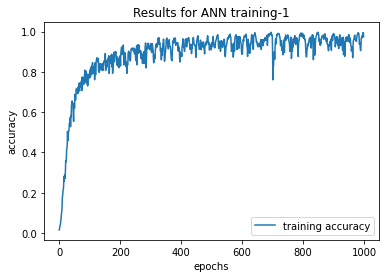

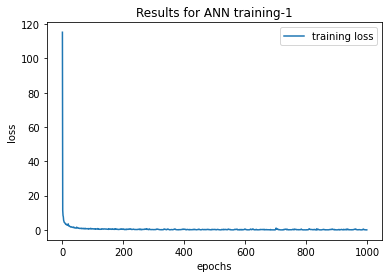

In [21]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Results for ANN training-1')
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Results for ANN training-1')
plt.savefig('Loss.png')

In [22]:
model = tf.keras.models.load_model('LEC.h5')
print("Loaded model from disk")

Loaded model from disk


In [23]:
y_pred= model.predict(X_test)
y_pred=np.round(y_pred)
np.set_printoptions(precision=2)
print(y_pred)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for the algorithm=>{}%".format(round(accuracy_score(y_test,y_pred)*100),2))

Accuracy Score for the algorithm=>48%
